In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [4]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="center", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [5]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [6]:
# df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

# df

# df.columns

# X=df[['ATRIB_MED1', 'ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# X

# X.info()


# cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
#        'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
#        'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
# X[cat] = X[cat].astype('category')

# y = df['Perda30']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

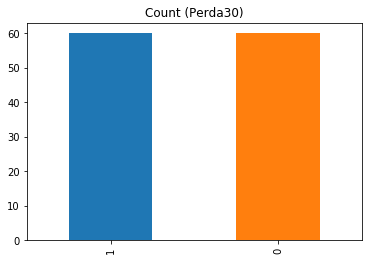

In [7]:
# train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
# test=pd.read_csv('baseProjetoTest.csv', index_col=0)

train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)

X_train = train[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

X_test = test[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_test = test['Perda30']

y_train = train['Perda30']

y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

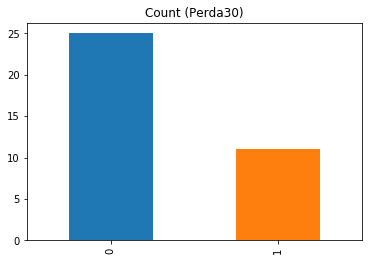

In [8]:
y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

<br>
## RandomForest

In [9]:
steps = [('scaler', StandardScaler()),(('rf', RandomForestClassifier(n_estimators=200, max_features=8, max_depth=12)))]
pipeline = Pipeline(steps)
# For RF is not a good option use scaler

In [10]:
random_scaled = pipeline.fit(X_train, y_train)

In [11]:
y_pred = pipeline.predict(X_test) 
accuracy_score(y_test, y_pred)

0.75

In [12]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

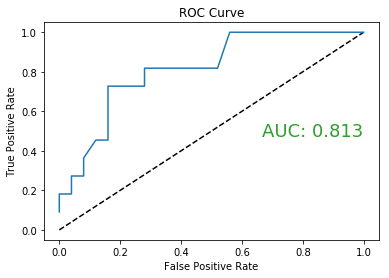

In [13]:
plotRoc(y_test, y_pred_prob)

Confusion matrix, without normalization


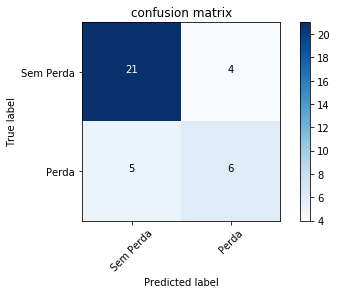

In [14]:
printcfm(y_test, y_pred,title='confusion matrix')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.84      0.82        25
          1       0.60      0.55      0.57        11

avg / total       0.74      0.75      0.75        36



## Fine-tunning the model.

To turn on Fine-tunning: <br>
    define ft = 1

In [16]:
ft = 0

### 2 - Grid Search

In [17]:
if ft == 1 :
    rf = RandomForestClassifier(n_jobs=-1, random_state=42)
    parameters = {'n_estimators' : [400, 500, 600],
                 'min_samples_split': np.arange(2, 5),
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [6,7,15],
                 'bootstrap': [True,False],
                 'warm_start': [True,False],
                 'criterion' :['entropy']
                 }
    cv = GridSearchCV(rf, param_grid=parameters, verbose=3, n_jobs=-1, cv=5)
                  #"max_depth": np.arange(1, 50),
                  #"max_features": [1, 3, 10],

                  #"min_samples_leaf": np.arange(1, 10),

                  #"criterion": ["gini", "entropy"]
    cv.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.1s 
<br>[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
<br>[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
<br>[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.2min
<br>[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.2min
<br>[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 11.8min
<br>[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 16.1min
<br>[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 21.0min
<br>[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 26.4min
<br>[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 32.3min
<br>[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 39.0min
<br>[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 46.5min
<br>[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 54.9min finished

In [18]:
if ft == 1:
    print("Best params: ", cv.best_params_,) 
    print("Best Score: %3.3f" %(cv.best_score_))
    y_pred = cv.predict(X_train_scaled)
    final_model =cv.best_estimator_
    print(final_model)

### Best Model Result (11/2018_v2)
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy', max_depth=15, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1, oob_score=False, random_state=42, verbose=0, warm_start=True)

### Best Model Result (11/2018)
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

### Best Model Result (09/2018)
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=525, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

In [19]:
final_model = RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

## Predicting the Classes in Trainning Set

In [20]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

In [21]:
y_pred = final_model.predict(X_train)
y_pred_prob = final_model.predict_proba(X_train)[:,1]

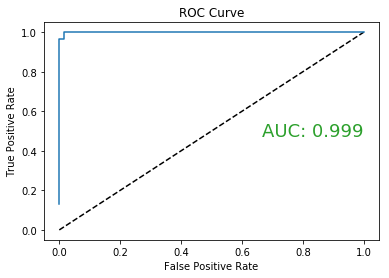

In [22]:
plotRoc(y_train, y_pred_prob)

In [23]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
print(cv_scores)

[0.88 0.92 0.88 0.92 0.96]


Confusion matrix, without normalization


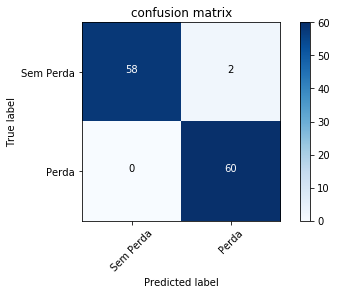

In [24]:
printcfm(y_train, y_pred, title='confusion matrix')

In [25]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98        60
          1       0.97      1.00      0.98        60

avg / total       0.98      0.98      0.98       120



## Evaluating the model with Cross-Validation

In [26]:
y_pred_prob = final_model.predict_proba(X_train)[:,1]

In [27]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


In [28]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


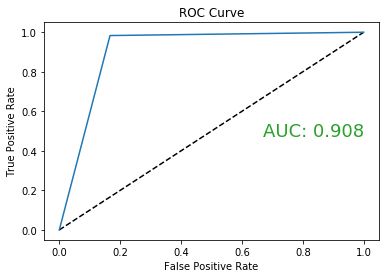

In [29]:
plotRoc(y_train, y_train_pred)

Confusion matrix, without normalization


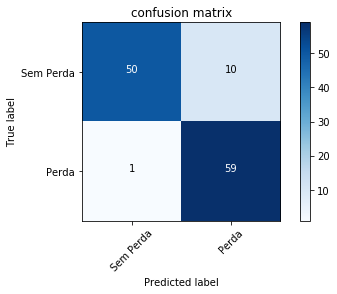

In [30]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [31]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90        60
          1       0.86      0.98      0.91        60

avg / total       0.92      0.91      0.91       120



## Predicting the Classes in Test Set

In [32]:
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)[:,1]

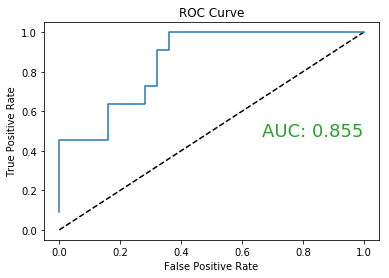

In [33]:
plotRoc(y_test, y_pred_prob)

Confusion matrix, without normalization


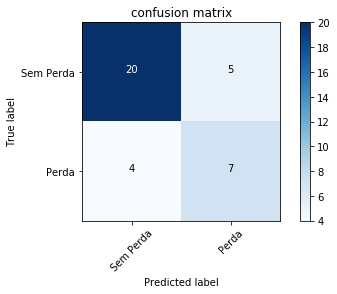

In [34]:
printcfm(y_test, y_pred, title='confusion matrix')

In [35]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.80      0.82        25
          1       0.58      0.64      0.61        11

avg / total       0.76      0.75      0.75        36



In [36]:
X=np.concatenate((X_train,X_test),axis=0)
y=np.append(y_train,y_test)

In [37]:
#  validation curve off
vc = 0

In [38]:
if vc = 1:

    print(__doc__)

    param_range = np.arange(1, 800, 2)

    train_scores, test_scores = validation_curve(
        final_model, X, y, param_name="n_estimators", param_range=param_range,
        cv=10, scoring="roc_auc", n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with RF")
    plt.xlabel("$\gamma$")
    plt.ylabel("AUC")
    #plt.ylim(0.0, 1.1)
    #plt.xlim(-1, 22)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

SyntaxError: invalid syntax (<ipython-input-38-0f6c100c07b1>, line 1)

# Add learning curves